Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

Variable Name	Description
Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No
 


In [846]:
# Import Linear Regression machine learning library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [847]:
df= pd.read_csv("C:\\Users\\user\\Desktop\\PG-DSBA\\Python for Data Science\\Predictive Modeling Week3\\Project report\\Holiday_Package.csv")

In [848]:
df.drop('Unnamed: 0',axis =1, inplace= True)
df.rename(columns={"Holliday_Package": "HolidayPackage"},inplace=True)
df

,HolidayPackage,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HolidayPackage     872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [850]:
df['HolidayPackage'] = df['HolidayPackage'].astype('category')
df['HolidayPackage'] = df['HolidayPackage'].cat.codes

df['foreign'] = df['foreign'].astype('category')
df['foreign'] = df['foreign'].cat.codes

In [851]:
df

,HolidayPackage,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


In [852]:
df.isna().sum()

HolidayPackage       0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [853]:
df.duplicated().sum()

0

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


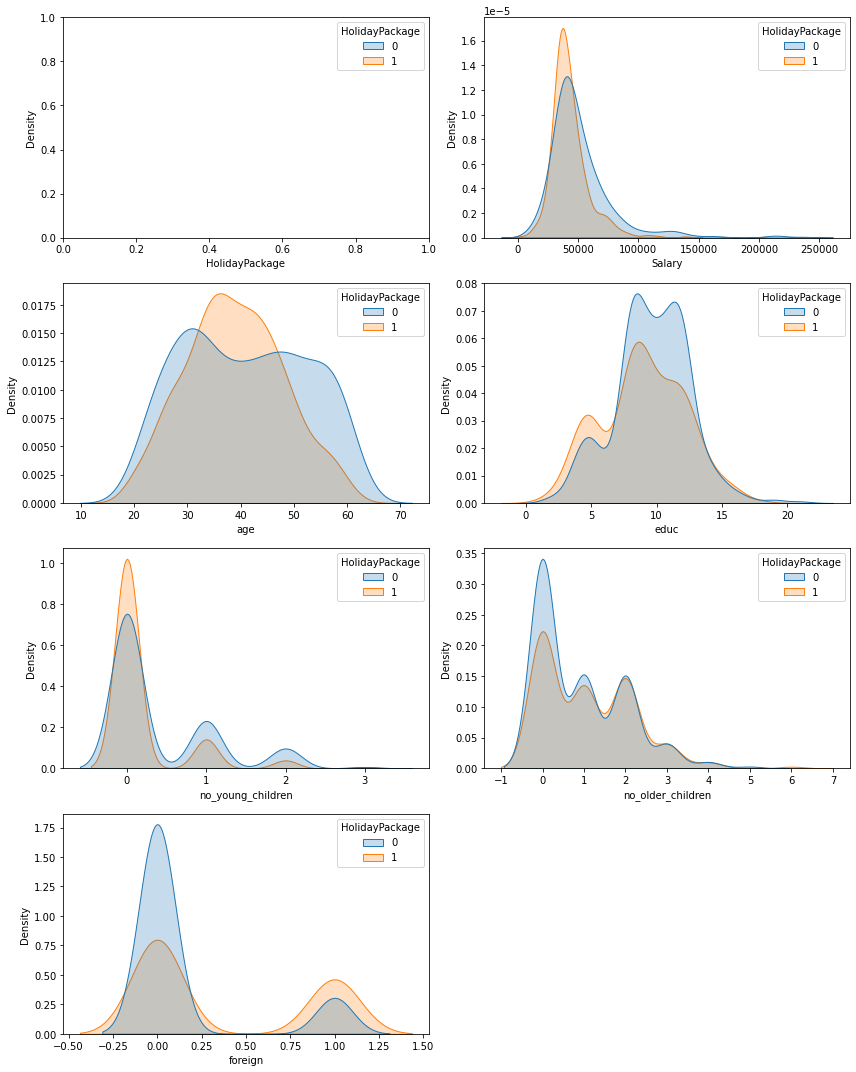

In [854]:
a = 1
plt.figure(figsize=(12,15))
for i in df.columns:
    plt.subplot(4,2,a)
    sns.kdeplot(x = df[i],hue = 'HolidayPackage', data = df, fill= True)
    a = a + 1
    plt.tight_layout()

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   HolidayPackage     872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [856]:
df

,HolidayPackage,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


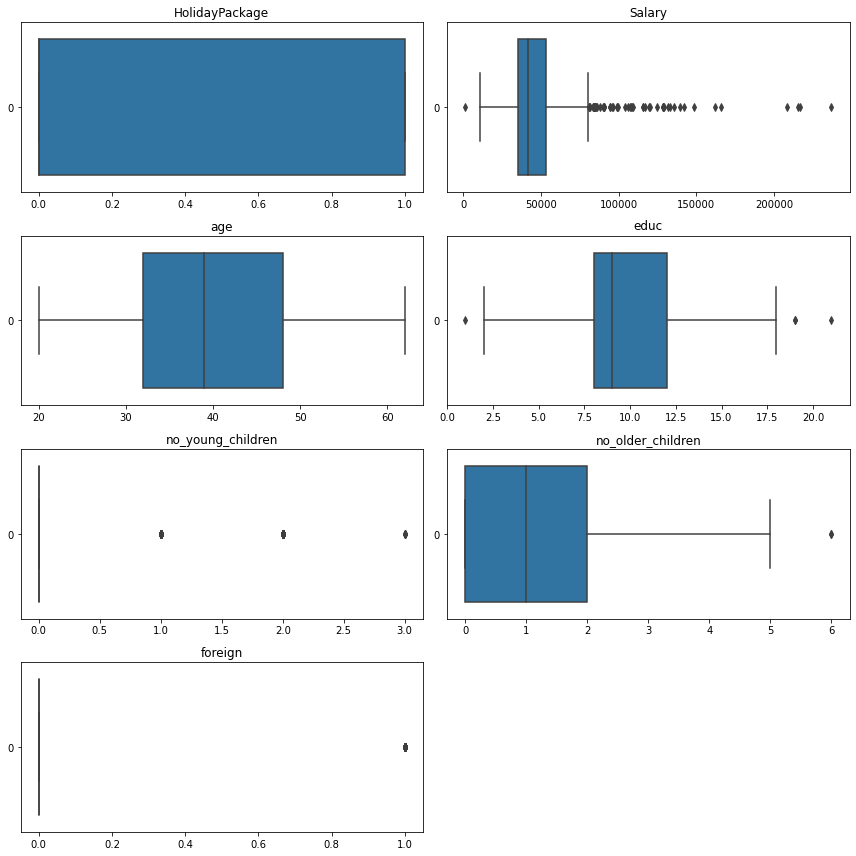

In [857]:
a = 1
plt.figure(figsize= (12,12))
for i in df.columns:
    if df[i].dtypes != 'object':
        plt.subplot(4,2,a)
        sns.boxplot(data=df[i],orient= 'h' )
        a = a + 1
        plt.title(label= i)
        plt.tight_layout()

In [858]:
df.describe().round(2)

,HolidayPackage,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.00,872.00,872.00,872.00,872.00,872.00,872.00
mean,0.46,47729.17,39.96,9.31,0.31,0.98,0.25
std,0.50,23418.67,10.55,3.04,0.61,1.09,0.43
min,0.00,1322.00,20.00,1.00,0.00,0.00,0.00
25%,0.00,35324.00,32.00,8.00,0.00,0.00,0.00
50%,0.00,41903.50,39.00,9.00,0.00,1.00,0.00
75%,1.00,53469.50,48.00,12.00,0.00,2.00,0.00
max,1.00,236961.00,62.00,21.00,3.00,6.00,1.00


<AxesSubplot:>

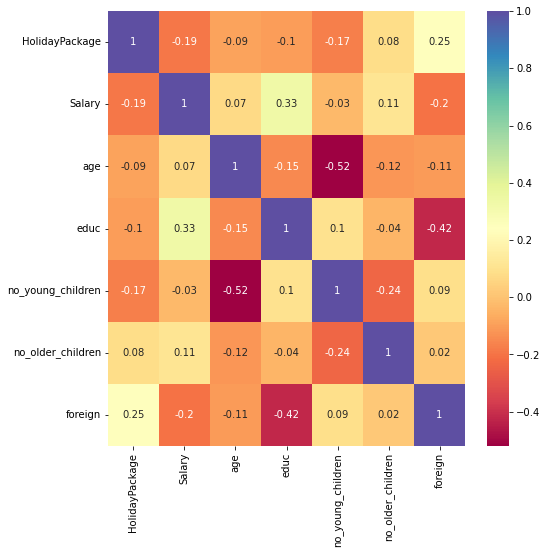

In [859]:
plt.figure(figsize= (8,8))
sns.heatmap(df.corr().round(2), annot= True, cmap = 'Spectral')

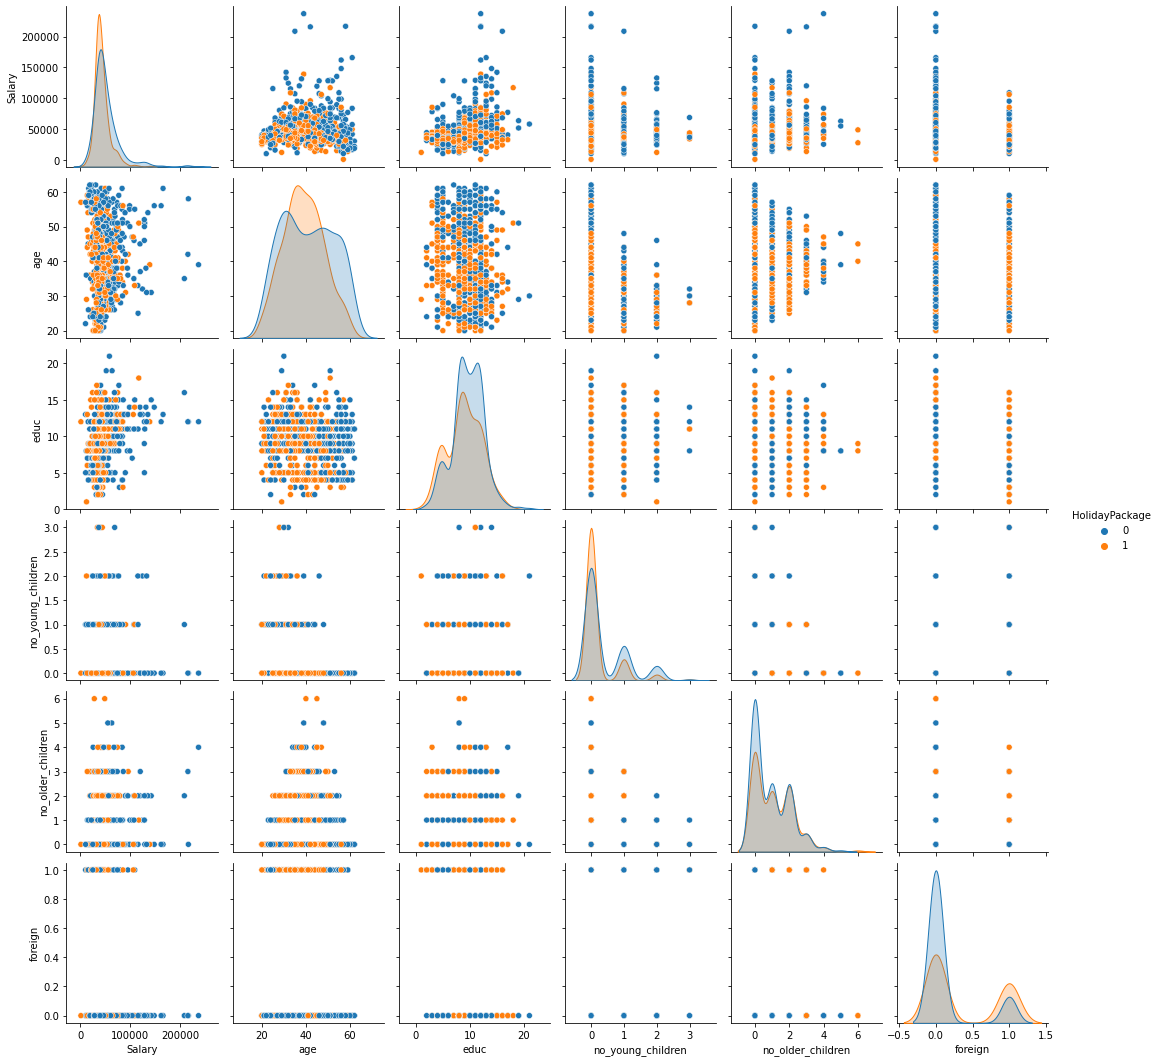

In [860]:
sns.pairplot(df ,diag_kind='kde' ,hue='HolidayPackage');

In [861]:
# salary, age and no. of young children as visible can be demarcated from histplot. 
# In general there is overlapping of plot which shows a similar distribution.

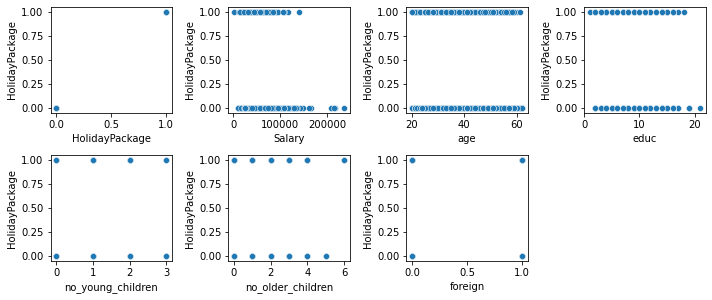

In [862]:
a = 1
b = 8
plt.figure(figsize= (10,10))
for i in df.columns:
    plt.subplot(5,4,a)
    sns.scatterplot(x= df[i],y = df.HolidayPackage);
    a = a + 1
    plt.tight_layout()

In [863]:
# df['Salary'] = df['Salary'].astype('object')


In [864]:
sal = np.array(df['Salary'])
x=0
while x < 872:
    if (sal[x,]) > 80000:
        sal[x,]= ("1")
        x = x + 1
    elif (((sal[x,]) > 60000) & ((sal[x,]) < 80001)):
        sal[x,]= ("2")
        x = x + 1 
    elif (((sal[x,]) > 40000) & ((sal[x,]) < 60001)):
        sal[x,]= ("3")
        x = x + 1         
    else:
        sal[x,]= ("4")
        x = x + 1
        
df['Salary'] = sal

In [865]:
### age = np.array(df['age'])
x=0
while x < 872:
    if (age[x,]) > 50:
        age[x,]= ("4")
        x = x + 1
    elif (((age[x,]) > 40) & ((age[x,]) < 51)):
        age[x,]= ("3")
        x = x + 1 
    elif (((age[x,]) > 30) & ((age[x,]) < 41)):
        age[x,]= ("2")
        x = x + 1         
    else:
        age[x,]= ("1")
        x = x + 1
        
df['age'] = age

In [866]:
educ = np.array(df['educ'])
x=0
while x < 872:
    if (educ[x,]) > 14:
        educ[x,]= ("1")
        x = x + 1
    elif (((educ[x,]) > 6) & ((educ[x,]) < 15)):
        educ[x,]= ("2")
        x = x + 1      
    else:
        educ[x,]= ("3")
        x = x + 1
        
df['educ'] = educ

In [867]:
no_older_children = np.array(df['no_older_children'])
x=0
while x < 872:
    if (no_older_children[x,]) > 4:
        no_older_children[x,]= ("1")
        x = x + 1
    elif (((no_older_children[x,]) > 2) & ((no_older_children[x,]) < 5)):
        no_older_children[x,]= ("2")
        x = x + 1      
    else:
        no_older_children[x,]= ("3")
        x = x + 1
        
df['no_older_children'] = no_older_children

In [868]:
df

,HolidayPackage,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,3,1,2,1,3,0
1,1,4,1,2,0,3,0
2,0,3,1,2,0,3,0
3,0,2,1,2,2,3,0
4,0,2,1,2,0,3,0
...,...,...,...,...,...,...,...
867,0,3,1,3,2,3,1
868,1,4,1,2,0,3,1
869,0,4,1,3,2,3,1
870,1,3,1,2,0,3,1


2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [953]:
# Copy all the predictor variables into X dataframe
x =df.drop('HolidayPackage', axis=1)

# Copy target into the y dataframe. 
y= df[['HolidayPackage']]

In [954]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [955]:
# Fit the Logistic Regression model
model =LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [908]:
ytrain_pred =model.predict(x_train)
ytest_pred =model.predict(x_test)

In [909]:
ytest_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int8)

In [910]:
ytrain_pred_prob =model.predict_proba(x_train)
ytest_pred_prob =model.predict_proba(x_test)
pd.DataFrame(ytrain_pred_prob),pd.DataFrame(ytest_pred_prob)

(            0         1
 0    0.566591  0.433409
 1    0.424901  0.575099
 2    0.932658  0.067342
 3    0.640511  0.359489
 4    0.423830  0.576170
 ..        ...       ...
 605  0.293143  0.706857
 606  0.235279  0.764721
 607  0.495111  0.504889
 608  0.706025  0.293975
 609  0.706025  0.293975
 
 [610 rows x 2 columns],
             0         1
 0    0.810557  0.189443
 1    0.235279  0.764721
 2    0.884026  0.115974
 3    0.932658  0.067342
 4    0.393124  0.606876
 ..        ...       ...
 257  0.361113  0.638887
 258  0.569304  0.430696
 259  0.237275  0.762725
 260  0.573688  0.426312
 261  0.569304  0.430696
 
 [262 rows x 2 columns])

In [786]:
# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, 
#     Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Model Evaluation

In [911]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.6409836065573771

In [913]:
model.score(x_test, y_test)

0.6412213740458015

0.6941588179383047


Text(0, 0.5, 'train_tpr')

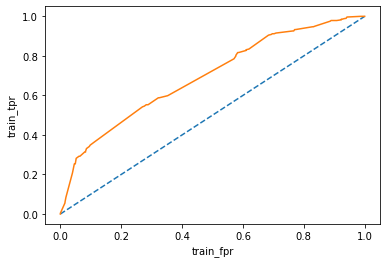

In [877]:
# predict probabilities
probs= model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs =probs[:, 1]

# calculate AUC
auc =roc_auc_score(y_train, probs)
print(auc)
# calculate roc curve
train_fpr, train_tpr, train_thershold =roc_curve(y_train,probs)
plt.plot([0,1],[0,1], linestyle= '--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('train_fpr')
plt.ylabel('train_tpr')

0.6987916298261126


Text(0, 0.5, 'test_tpr')

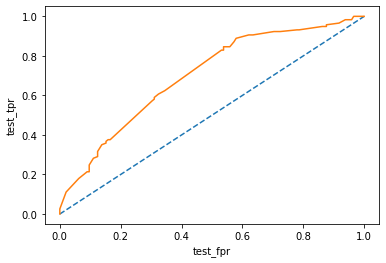

In [878]:
# Accuracy - Test Data
# predict probabilities
probs= model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs =probs[:, 1]

# calculate AUC
auc =roc_auc_score(y_test, probs)
print(auc)
# calculate roc curve
test_fpr, test_tpr, test_thershold =roc_curve(y_test,probs)
plt.plot([0,1],[0,1], linestyle= '--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('test_fpr')
plt.ylabel('test_tpr')

### Confusion Matrix for the training data

In [879]:
confusion_matrix(y_train, ytrain_pred)

array([[234,  92],
       [127, 157]], dtype=int64)

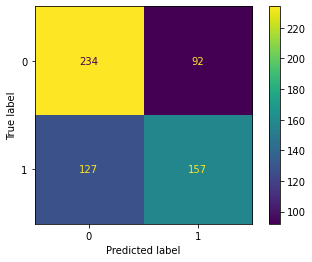

In [880]:
plot_confusion_matrix(model, x_train, y_train)

In [881]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       326
           1       0.63      0.55      0.59       284

    accuracy                           0.64       610
   macro avg       0.64      0.64      0.64       610
weighted avg       0.64      0.64      0.64       610



In [882]:
confusion_matrix(y_test, ytest_pred)

array([[100,  45],
       [ 49,  68]], dtype=int64)

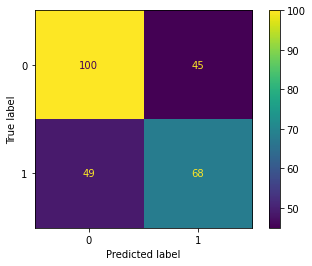

In [883]:
plot_confusion_matrix(model, x_test, y_test)

In [884]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       145
           1       0.60      0.58      0.59       117

    accuracy                           0.64       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.64      0.64       262



## Applying GridSearchCV for Logistic Regression

In [928]:
grid= {'penalty':['l2', 'none'],
       'solver':['sag','lbfgs']}

In [929]:
model =LogisticRegression(max_iter=10000,tol=0.001, n_jobs=2)

In [930]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='f1')

In [931]:
grid_search.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2, tol=0.001),
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs']},
             scoring='f1')

In [932]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag'}

In [933]:
best_model =grid_search.best_estimator_

In [934]:
model =LogisticRegression(penalty= 'l2', solver= 'liblinear')
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='liblinear')

In [935]:
ytrain_predict =best_model.predict(x_train)
print(ytrain_predict)

ytrain_predict_prob = best_model.predict_proba(x_train)
pd.DataFrame(ytrain_predict_prob)

[0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0
 1 1 1 0 1 0 0 1 0 1 1 0 

,0,1
0,0.566038,0.433962
1,0.424605,0.575395
2,0.932747,0.067253
3,0.640642,0.359358
4,0.424098,0.575902
...,...,...
605,0.292982,0.707018
606,0.235036,0.764964
607,0.494967,0.505033
608,0.706262,0.293738


In [936]:
ytest_predict =best_model.predict(x_test)
print(ytest_predict)

ytest_predict_prob = best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob)

[0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0]


,0,1
0,0.810666,0.189334
1,0.235036,0.764964
2,0.884054,0.115946
3,0.932747,0.067253
4,0.394052,0.605948
...,...,...
257,0.361584,0.638416
258,0.569303,0.430697
259,0.237437,0.762563
260,0.574384,0.425616


In [937]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.6409836065573771

In [938]:
model.score(x_test, y_test)

0.6412213740458015

# calculate AUC

AUC for the Training Data: 0.698
AUC for the Test Data: 0.697


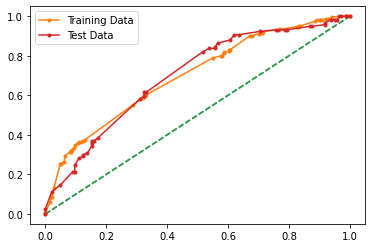

In [939]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Confusion Matrix for the training data

In [940]:
confusion_matrix(y_train, ytrain_pred)

array([[234,  92],
       [127, 157]], dtype=int64)

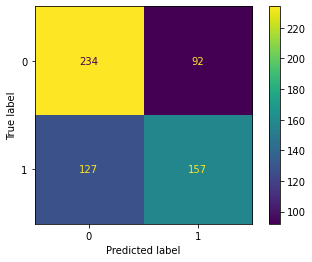

In [941]:
plot_confusion_matrix(model, x_train, y_train)

In [942]:
print(classification_report(y_train, ytrain_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       326
           1       0.63      0.55      0.59       284

    accuracy                           0.64       610
   macro avg       0.64      0.64      0.64       610
weighted avg       0.64      0.64      0.64       610



In [943]:
confusion_matrix(y_test, ytest_pred)

array([[100,  45],
       [ 49,  68]], dtype=int64)

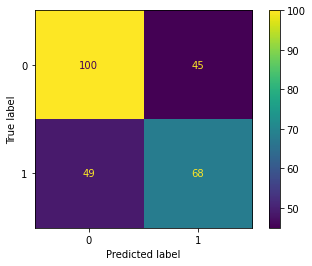

In [944]:
plot_confusion_matrix(model, x_test, y_test)

In [945]:
print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       145
           1       0.60      0.58      0.59       117

    accuracy                           0.64       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.64      0.64       262



### LDA Model 

In [957]:
#Build LDA Model
clf = LinearDiscriminantAnalysis(solver='svd',tol= 0.001)
model=clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [958]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(x_test)

### Training Data and Test Data Confusion Matrix Comparison

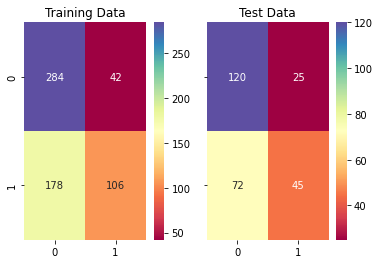

In [959]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Spectral',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Spectral',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [960]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.61      0.87      0.72       326
           1       0.72      0.37      0.49       284

    accuracy                           0.64       610
   macro avg       0.67      0.62      0.61       610
weighted avg       0.66      0.64      0.61       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.62      0.83      0.71       145
           1       0.64      0.38      0.48       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.60       262
weighted avg       0.63      0.63      0.61       262
 



### Probability prediction for the training and test data

In [961]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(x_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(x_test)

In [962]:
pred_prob_train[:,1]

array([0.41347231, 0.59051837, 0.06854929, 0.34984695, 0.57866147,
       0.77029246, 0.34984695, 0.34984695, 0.28465624, 0.23834079,
       0.42117712, 0.34984695, 0.42117712, 0.34984695, 0.30399565,
       0.77029246, 0.80892649, 0.11861074, 0.42117712, 0.82396112,
       0.42117712, 0.28465624, 0.34820418, 0.42117712, 0.41347231,
       0.33439033, 0.49595655, 0.49595655, 0.77585102, 0.49595655,
       0.59051837, 0.71263054, 0.42117712, 0.23834079, 0.49595655,
       0.42117712, 0.49595655, 0.49595655, 0.34984695, 0.33439033,
       0.35708796, 0.47879857, 0.49595655, 0.77585102, 0.11861074,
       0.80892649, 0.71907555, 0.11861074, 0.11861074, 0.50387794,
       0.49595655, 0.18792243, 0.42117712, 0.34984695, 0.77585102,
       0.49595655, 0.42117712, 0.34984695, 0.66809107, 0.49595655,
       0.34984695, 0.46169047, 0.28318625, 0.21586732, 0.49595655,
       0.42117712, 0.42117712, 0.66809107, 0.28465624, 0.42117712,
       0.4289205 , 0.42117712, 0.47879857, 0.77029246, 0.49595

AUC for the Training Data: 0.698
AUC for the Test Data: 0.697


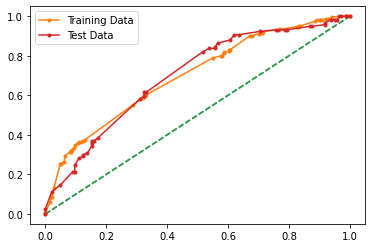

In [963]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# How to change the cut-off values for maximum accuracy?

0.1 

Accuracy Score 0.4721
F1 Score 0.6382 

Confusion Matrix


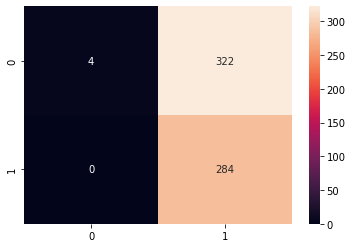

0.2 

Accuracy Score 0.5082
F1 Score 0.6503 

Confusion Matrix


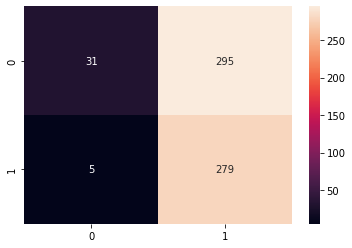

0.3 

Accuracy Score 0.582
F1 Score 0.6727 

Confusion Matrix


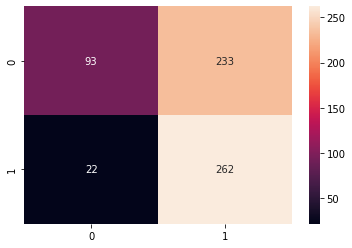

0.4 

Accuracy Score 0.6
F1 Score 0.6544 

Confusion Matrix


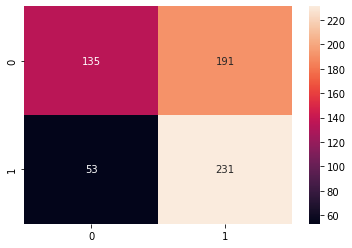

0.5 

Accuracy Score 0.6393
F1 Score 0.4907 

Confusion Matrix


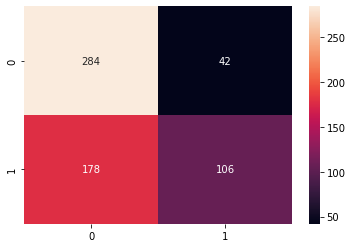

0.6 

Accuracy Score 0.6377
F1 Score 0.4489 

Confusion Matrix


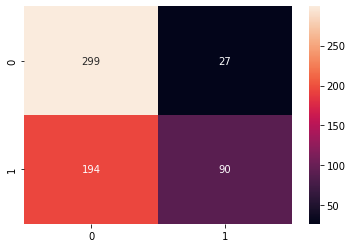

0.7 

Accuracy Score 0.6361
F1 Score 0.4278 

Confusion Matrix


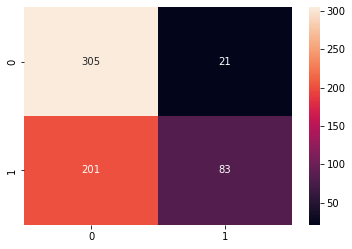

0.8 

Accuracy Score 0.5639
F1 Score 0.1529 

Confusion Matrix


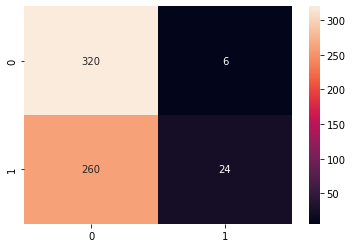

0.9 

Accuracy Score 0.5344
F1 Score 0.0 

Confusion Matrix


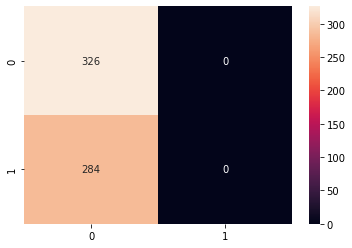

In [964]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [1012]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.5:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

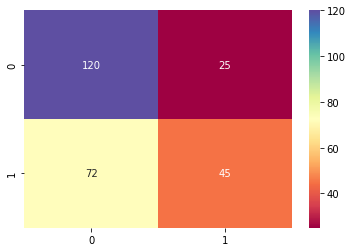

In [1013]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Spectral');

In [1014]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.62      0.83      0.71       145
           1       0.64      0.38      0.48       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.60       262
weighted avg       0.63      0.63      0.61       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.62      0.83      0.71       145
           1       0.64      0.38      0.48       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.60       262
weighted avg       0.63      0.63      0.61       262
 



In [787]:
2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project.
There should be proper business interpretation and actionable insights present.

SyntaxError: invalid syntax (Temp/ipykernel_12860/3149035209.py, line 1)